In [10]:
import pandas as pd
import pickle
import numpy as np
from typing import Tuple
from tensorflow.keras.datasets import mnist
from tensorflow.keras.initializers import Constant
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt


In [12]:
# baseline model
def build_model():
	# create model
	model = Sequential()
	model.add(Dense(35, input_dim=35, activation='relu'))
	model.add(Dense(24, activation='relu'))
	model.add(Dense(18, activation='relu'))
	model.add(Dense(12, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
		
	return model

In [13]:
accuracyDL= pd.DataFrame(columns=['Sentence', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])


n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]
feature_cols = ['Erstloesung','Schussel','Erfolg', 'Schwierigkeit', 'ist_Schulzeit', 'MehrfachFalsch', 'vorher_abgebrochen','Fehler', 'Klassenstufe', 'Jahredabei', 'AnzahlAufgaben', 'Sex__m', 'Sex__w', 'Testposition__pruefung', 'Testposition__training','Testposition__version', 'Art__GK', 'Art__GR', 'Art__GZ', 'Art__K', 'Art__LB','UserAttribut', 'OrderNumber', 'steps', 'BedeutungNoten','SchreibenGern', 'Buecher', 'SchreibenLeicht','deutschnote','eigSprache','ErstSchrift', 'SpracheMutter', 'LesenGern','SpracheVater', 'LesenLeicht']
#
for i in n:
    path='matrices_forte_vars/matrix'+str(i)+'.pkl'
    infile = open(path,'rb')
    df = pickle.load(infile)
    infile.close()
    df=df.reset_index()

    y_len = len(feature_cols)
    X = df[feature_cols].astype(float)
    y = df.y
    y= y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


    model = build_model()

    model.compile(
        loss="binary_crossentropy",
        optimizer='Adam',
        metrics=["accuracy"]
    )

    model.fit(
        x=X_train,
        y=y_train,
        epochs=10,
        batch_size=128,
        verbose=0,
        validation_data=(X_test, y_test)
    )

    scores = model.evaluate(
        x=X_test,
        y=y_test,
        verbose=0
    )

    yhat_probs = model.predict(X_test, verbose=0)
    yhat_classes =  (model.predict(X_test) > 0.5).astype("int32")
    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]

    accuracy = accuracy_score(y_test, yhat_classes)
    precision = precision_score(y_test, yhat_classes)
    recall = recall_score(y_test, yhat_classes)
    f1 = f1_score(y_test, yhat_classes)
    auc = roc_auc_score(y_test, yhat_probs)
    
    accuracyDL = accuracyDL.append({'Sentence': i, 'Accuracy':accuracy,'Precision': precision, 'Recall':recall, 'F1':f1, 'AUC':auc}, ignore_index=True)

accuracyDL.to_pickle('accuracyDL_vars.pkl')

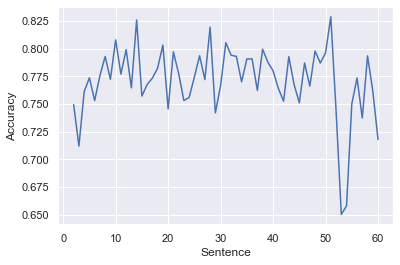

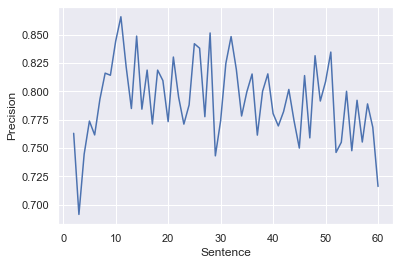

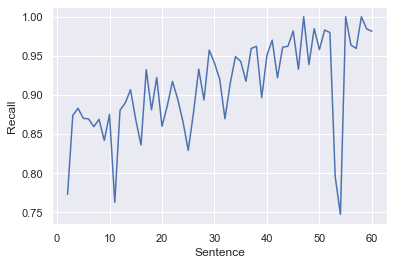

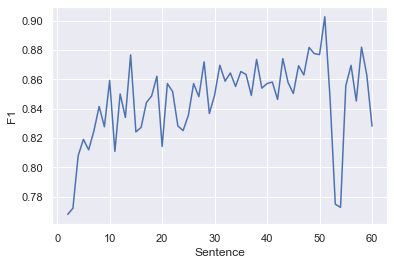

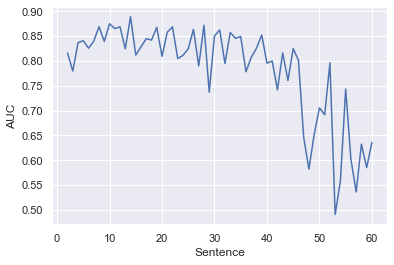

In [14]:
sns.set_theme()

sns.lineplot(data=accuracyDL, x="Sentence", y="Accuracy")
plt.show()

sns.lineplot(data=accuracyDL, x="Sentence", y="Precision")
plt.show()

sns.lineplot(data=accuracyDL, x="Sentence", y="Recall")
plt.show()

sns.lineplot(data=accuracyDL, x="Sentence", y="F1")
plt.show()

sns.lineplot(data=accuracyDL, x="Sentence", y="AUC")
plt.show()